In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

circuitos=pd.read_excel('dataset_pfinal_ANS_V4.xlsx')
circuitos.set_index(['Id'],inplace=True)

Text(0.5, 0, 'Epsilon Value')

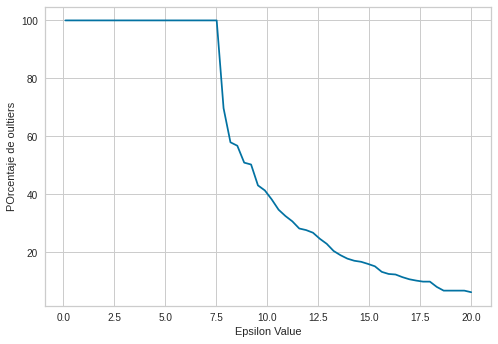

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X= circuitos.loc[:, ~circuitos.columns.isin( ['Substation Name','Transformer','MV Feeder Code','Feeder Name MV'])]
X = pd.get_dummies(X)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)

from sklearn.cluster import DBSCAN
outlier_percent = []

for eps in np.linspace(0.1,20,60):
    dbscan = DBSCAN(eps=eps,min_samples=2*X_escalado.shape[1])
    dbscan.fit(X_escalado)
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

sns.lineplot(x=np.linspace(0.1,20,60),y=outlier_percent)
plt.ylabel("POrcentaje de oultiers")
plt.xlabel("Epsilon Value")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


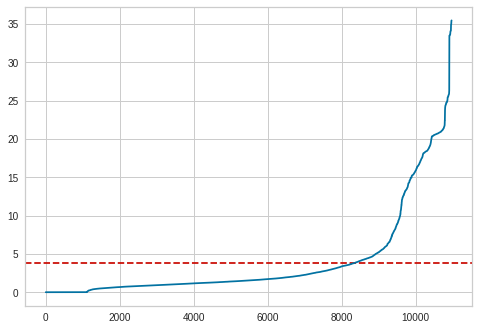

3.805292923250365


In [34]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
!pip install kneed
from kneed import KneeLocator
import warnings
warnings.filterwarnings('ignore')
escalado_df = pd.DataFrame(X_escalado,columns=X.columns)
neigh = NearestNeighbors(n_neighbors = 10)
nbrs = neigh.fit(X_escalado)
distancias, indices = nbrs.kneighbors(X_escalado)
distancias = np.sort(distancias.flatten())
knee = KneeLocator(np.arange(len(distancias)), distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
plt.axhline(y = distancias[knee.knee], color = 'r', linestyle = '--')
plt.plot(distancias)
plt.show()
knee = KneeLocator(np.arange(len(distancias)), distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
print(distancias[knee.knee])

In [46]:
#Reentreneamo DBS can con epsilon = 20 que corresponde al 5% de oultiers

dbscan = DBSCAN(eps=20,min_samples=2*X_escalado.shape[1])
labels=dbscan.fit_predict(X_escalado)
np.unique(dbscan.labels_)

#Reentreneamo DBS can con epsilon = 20 que corresponde al 5% de oultiers

dbscan = DBSCAN(eps=3.805292923250365,min_samples=2*X_escalado.shape[1])
labels=dbscan.fit_predict(X_escalado)
np.unique(dbscan.labels_)

array([-1])

No veo clusters densamente proporcionados/